# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count',
                  'synonyms_count', 'orthographic_density']
N_COMPONENTS = 3
BIN_COUNT = 4

Imports and database setup.

In [2]:
from itertools import product

import pandas as pd
import seaborn as sb
from scipy import stats
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.majority, past=Past.last_bin, durl=Durl.exclude_past, max_distance=2)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id)\
        .filter(Substitution.model == model)
    print("Got {} substitutions for model {}"
          .format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = \
                substitution.features(feature, sentence_relative='median')
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'feature': feature,
                'source': source,
                'source_rel': source_rel,
                'destination': destination,
                'destination_rel': destination_rel,
                'h0': substitution.feature_average(feature),
                'h0_rel': substitution.feature_average(
                        feature, sentence_relative='median'),
                'h0n': substitution.feature_average(
                        feature, source_synonyms=True),
                'h0n_rel': substitution.feature_average(
                        feature, source_synonyms=True,
                        sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 1731 substitutions for model Model(time=Time.continuous, source=Source.majority, past=Past.last_bin, durl=Durl.exclude_past, max_distance=2)


  0% (   0 of 1731) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   6 of 1731) |                       | Elapsed Time: 0:00:26 ETA: 2:09:13

  1% (  22 of 1731) |                       | Elapsed Time: 0:00:27 ETA: 0:38:43

  2% (  36 of 1731) |                       | Elapsed Time: 0:00:27 ETA: 0:21:32

  3% (  52 of 1731) |                       | Elapsed Time: 0:00:27 ETA: 0:14:53

  4% (  72 of 1731) |                       | Elapsed Time: 0:00:27 ETA: 0:00:25

  5% (  87 of 1731) |#                      | Elapsed Time: 0:00:28 ETA: 0:00:24

  6% ( 109 of 1731) |#                      | Elapsed Time: 0:00:28 ETA: 0:00:23

  7% ( 130 of 1731) |#                      | Elapsed Time: 0:00:28 ETA: 0:00:22

  8% ( 146 of 1731) |#                      | Elapsed Time: 0:00:29 ETA: 0:00:22

  9% ( 159 of 1731) |##                     | Elapsed Time: 0:00:29 ETA: 0:00:22

 10% ( 174 of 1731) |##                     | Elapsed Time: 0:00:29 ETA: 0:00:22

 10% ( 187 of 1731) |##                     | Elapsed Time: 0:00:29 ETA: 0:00:23

 11% ( 202 of 1731) |##                     | Elapsed Time: 0:00:29 ETA: 0:00:23

 12% ( 217 of 1731) |##                     | Elapsed Time: 0:00:30 ETA: 0:00:23

 13% ( 230 of 1731) |###                    | Elapsed Time: 0:00:30 ETA: 0:00:23

 14% ( 247 of 1731) |###                    | Elapsed Time: 0:00:30 ETA: 0:00:22

 15% ( 268 of 1731) |###                    | Elapsed Time: 0:00:30 ETA: 0:00:21

 16% ( 289 of 1731) |###                    | Elapsed Time: 0:00:31 ETA: 0:00:21

 17% ( 303 of 1731) |####                   | Elapsed Time: 0:00:31 ETA: 0:00:21

 18% ( 317 of 1731) |####                   | Elapsed Time: 0:00:31 ETA: 0:00:20

 19% ( 331 of 1731) |####                   | Elapsed Time: 0:00:31 ETA: 0:00:21

 20% ( 347 of 1731) |####                   | Elapsed Time: 0:00:32 ETA: 0:00:22

 20% ( 361 of 1731) |####                   | Elapsed Time: 0:00:32 ETA: 0:00:22

 21% ( 375 of 1731) |####                   | Elapsed Time: 0:00:32 ETA: 0:00:21

 22% ( 390 of 1731) |#####                  | Elapsed Time: 0:00:32 ETA: 0:00:21

 23% ( 405 of 1731) |#####                  | Elapsed Time: 0:00:32 ETA: 0:00:19

 24% ( 419 of 1731) |#####                  | Elapsed Time: 0:00:33 ETA: 0:00:18

 25% ( 439 of 1731) |#####                  | Elapsed Time: 0:00:33 ETA: 0:00:19

 26% ( 455 of 1731) |######                 | Elapsed Time: 0:00:33 ETA: 0:00:19

 27% ( 469 of 1731) |######                 | Elapsed Time: 0:00:33 ETA: 0:00:19

 27% ( 484 of 1731) |######                 | Elapsed Time: 0:00:34 ETA: 0:00:19

 28% ( 498 of 1731) |######                 | Elapsed Time: 0:00:34 ETA: 0:00:18

 29% ( 512 of 1731) |######                 | Elapsed Time: 0:00:34 ETA: 0:00:18

 30% ( 527 of 1731) |#######                | Elapsed Time: 0:00:34 ETA: 0:00:18

 31% ( 541 of 1731) |#######                | Elapsed Time: 0:00:35 ETA: 0:00:17

 32% ( 555 of 1731) |#######                | Elapsed Time: 0:00:35 ETA: 0:00:17

 32% ( 568 of 1731) |#######                | Elapsed Time: 0:00:35 ETA: 0:00:18

 33% ( 585 of 1731) |#######                | Elapsed Time: 0:00:35 ETA: 0:00:17

 34% ( 599 of 1731) |#######                | Elapsed Time: 0:00:35 ETA: 0:00:17

 35% ( 612 of 1731) |########               | Elapsed Time: 0:00:36 ETA: 0:00:17

 36% ( 628 of 1731) |########               | Elapsed Time: 0:00:36 ETA: 0:00:16

 37% ( 642 of 1731) |########               | Elapsed Time: 0:00:36 ETA: 0:00:16

 37% ( 657 of 1731) |########               | Elapsed Time: 0:00:36 ETA: 0:00:16

 38% ( 671 of 1731) |########               | Elapsed Time: 0:00:37 ETA: 0:00:16

 39% ( 685 of 1731) |#########              | Elapsed Time: 0:00:37 ETA: 0:00:15

 40% ( 700 of 1731) |#########              | Elapsed Time: 0:00:37 ETA: 0:00:15

 41% ( 715 of 1731) |#########              | Elapsed Time: 0:00:37 ETA: 0:00:15

 42% ( 728 of 1731) |#########              | Elapsed Time: 0:00:37 ETA: 0:00:15

 42% ( 742 of 1731) |#########              | Elapsed Time: 0:00:38 ETA: 0:00:15

 43% ( 758 of 1731) |##########             | Elapsed Time: 0:00:38 ETA: 0:00:14

 45% ( 779 of 1731) |##########             | Elapsed Time: 0:00:38 ETA: 0:00:14

 45% ( 793 of 1731) |##########             | Elapsed Time: 0:00:38 ETA: 0:00:14

 46% ( 809 of 1731) |##########             | Elapsed Time: 0:00:39 ETA: 0:00:13

 47% ( 823 of 1731) |##########             | Elapsed Time: 0:00:39 ETA: 0:00:13

 48% ( 837 of 1731) |###########            | Elapsed Time: 0:00:39 ETA: 0:00:13

 49% ( 851 of 1731) |###########            | Elapsed Time: 0:00:39 ETA: 0:00:13

 50% ( 866 of 1731) |###########            | Elapsed Time: 0:00:40 ETA: 0:00:13

 50% ( 880 of 1731) |###########            | Elapsed Time: 0:00:40 ETA: 0:00:13

 51% ( 895 of 1731) |###########            | Elapsed Time: 0:00:40 ETA: 0:00:12

 52% ( 909 of 1731) |############           | Elapsed Time: 0:00:40 ETA: 0:00:12

 53% ( 922 of 1731) |############           | Elapsed Time: 0:00:40 ETA: 0:00:12

 54% ( 937 of 1731) |############           | Elapsed Time: 0:00:41 ETA: 0:00:12

 55% ( 953 of 1731) |############           | Elapsed Time: 0:00:41 ETA: 0:00:12

 55% ( 967 of 1731) |############           | Elapsed Time: 0:00:41 ETA: 0:00:11

 56% ( 981 of 1731) |#############          | Elapsed Time: 0:00:41 ETA: 0:00:11

 57% ( 996 of 1731) |#############          | Elapsed Time: 0:00:42 ETA: 0:00:11

 58% (1008 of 1731) |#############          | Elapsed Time: 0:00:42 ETA: 0:00:11

 59% (1025 of 1731) |#############          | Elapsed Time: 0:00:42 ETA: 0:00:11

 60% (1046 of 1731) |#############          | Elapsed Time: 0:00:42 ETA: 0:00:10

 61% (1061 of 1731) |##############         | Elapsed Time: 0:00:43 ETA: 0:00:10

 62% (1075 of 1731) |##############         | Elapsed Time: 0:00:43 ETA: 0:00:10

 62% (1089 of 1731) |##############         | Elapsed Time: 0:00:43 ETA: 0:00:09

 63% (1104 of 1731) |##############         | Elapsed Time: 0:00:43 ETA: 0:00:09

 64% (1118 of 1731) |##############         | Elapsed Time: 0:00:43 ETA: 0:00:09

 65% (1132 of 1731) |###############        | Elapsed Time: 0:00:44 ETA: 0:00:09

 66% (1147 of 1731) |###############        | Elapsed Time: 0:00:44 ETA: 0:00:08

 67% (1161 of 1731) |###############        | Elapsed Time: 0:00:44 ETA: 0:00:08

 67% (1176 of 1731) |###############        | Elapsed Time: 0:00:44 ETA: 0:00:08

 68% (1191 of 1731) |###############        | Elapsed Time: 0:00:45 ETA: 0:00:08

 69% (1204 of 1731) |###############        | Elapsed Time: 0:00:45 ETA: 0:00:08

 70% (1218 of 1731) |################       | Elapsed Time: 0:00:45 ETA: 0:00:08

 71% (1234 of 1731) |################       | Elapsed Time: 0:00:45 ETA: 0:00:07

 71% (1246 of 1731) |################       | Elapsed Time: 0:00:45 ETA: 0:00:07

 72% (1262 of 1731) |################       | Elapsed Time: 0:00:46 ETA: 0:00:07

 73% (1277 of 1731) |################       | Elapsed Time: 0:00:46 ETA: 0:00:07

 74% (1290 of 1731) |#################      | Elapsed Time: 0:00:46 ETA: 0:00:07

 75% (1307 of 1731) |#################      | Elapsed Time: 0:00:46 ETA: 0:00:06

 76% (1327 of 1731) |#################      | Elapsed Time: 0:00:47 ETA: 0:00:06

 77% (1342 of 1731) |#################      | Elapsed Time: 0:00:47 ETA: 0:00:05

 78% (1356 of 1731) |##################     | Elapsed Time: 0:00:47 ETA: 0:00:05

 79% (1371 of 1731) |##################     | Elapsed Time: 0:00:47 ETA: 0:00:05

 80% (1385 of 1731) |##################     | Elapsed Time: 0:00:48 ETA: 0:00:05

 80% (1399 of 1731) |##################     | Elapsed Time: 0:00:48 ETA: 0:00:05

 81% (1415 of 1731) |##################     | Elapsed Time: 0:00:48 ETA: 0:00:04

 82% (1429 of 1731) |##################     | Elapsed Time: 0:00:48 ETA: 0:00:04

 83% (1443 of 1731) |###################    | Elapsed Time: 0:00:48 ETA: 0:00:04

 84% (1456 of 1731) |###################    | Elapsed Time: 0:00:49 ETA: 0:00:04

 85% (1472 of 1731) |###################    | Elapsed Time: 0:00:49 ETA: 0:00:03

 85% (1486 of 1731) |###################    | Elapsed Time: 0:00:49 ETA: 0:00:03

 86% (1500 of 1731) |###################    | Elapsed Time: 0:00:49 ETA: 0:00:03

 87% (1515 of 1731) |####################   | Elapsed Time: 0:00:50 ETA: 0:00:03

 88% (1529 of 1731) |####################   | Elapsed Time: 0:00:50 ETA: 0:00:03

 89% (1544 of 1731) |####################   | Elapsed Time: 0:00:51 ETA: 0:00:05

 90% (1558 of 1731) |####################   | Elapsed Time: 0:00:51 ETA: 0:00:04

 90% (1570 of 1731) |####################   | Elapsed Time: 0:00:51 ETA: 0:00:04

 91% (1587 of 1731) |#####################  | Elapsed Time: 0:00:52 ETA: 0:00:04

 92% (1602 of 1731) |#####################  | Elapsed Time: 0:00:52 ETA: 0:00:02

 93% (1615 of 1731) |#####################  | Elapsed Time: 0:00:52 ETA: 0:00:01

 94% (1630 of 1731) |#####################  | Elapsed Time: 0:00:52 ETA: 0:00:01

 95% (1645 of 1731) |#####################  | Elapsed Time: 0:00:52 ETA: 0:00:01

 95% (1659 of 1731) |###################### | Elapsed Time: 0:00:53 ETA: 0:00:01

 96% (1674 of 1731) |###################### | Elapsed Time: 0:00:53 ETA: 0:00:00

 97% (1688 of 1731) |###################### | Elapsed Time: 0:00:53 ETA: 0:00:00

 98% (1700 of 1731) |###################### | Elapsed Time: 0:00:53 ETA: 0:00:00

 99% (1716 of 1731) |###################### | Elapsed Time: 0:00:54 ETA: 0:00:00

100% (1731 of 1731) |######################| Elapsed Time: 0:00:54 Time: 0:00:54


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'feature'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

Prepare feature ordering.

In [5]:
ordered_features = sorted(
    Substitution.__features__,
    key=lambda f: Substitution._transformed_feature(f).__doc__
)

### What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the average feature of an appearing word upon substitution, as a function of the feature of the disappearing word:
$$\nu_{\phi}(f) = \left< \phi(w') \right>_{\{w \rightarrow w' | \phi(w) = f \}}$$
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the average sentence-relative feature of an appearing word upon substitution as a function of the sentence-relative feature of the disappearing word, i.e. $\phi($destination$) - \phi($destination sentence$)$ as a function of $\phi($source$) - \phi($source sentence$)$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted with fixed-width bins, then quantile bins, with absolute feature values, then with relative-to-sentence features.

In [6]:
def print_significance(name, bins, h0, h0n, values):
    bin_count = bins.max() + 1
    print()
    print('-' * len(name))
    print(name)
    print('-' * len(name))
    header = ('Bin  |   '
              + ' |   '.join(map(str, range(1, bin_count + 1)))
              + ' |')
    print(header)
    print('-' * len(header))
    
    for null_name, nulls in [('H_0 ', h0), ('H_00', h0n)]:
        bin_values = np.zeros(bin_count)
        bin_nulls = np.zeros(bin_count)
        cis = np.zeros((bin_count, 3))

        for i in range(bin_count):
            indices = bins == i
            n = (indices).sum()
            s = values[indices].std(ddof=1)

            bin_values[i] = values[indices].mean()
            bin_nulls[i] = nulls[indices].mean()
            for j, alpha in enumerate([.05, .01, .001]):
                cis[i, j] = (stats.t.ppf(1 - alpha/2, n - 1)
                             * values[indices].std(ddof=1)
                             / np.sqrt(n - 1))

        print(null_name + ' |', end='')
        differences = ((bin_values[:,np.newaxis]
                        < bin_nulls[:,np.newaxis] - cis)
                       | (bin_values[:,np.newaxis]
                          > bin_nulls[:,np.newaxis] + cis))
        for i in range(bin_count):
            if differences[i].any():
                n_stars = np.where(differences[i])[0].max()
                bin_stars = '*' * (1 + n_stars) + ' ' * (2 - n_stars)
            else:
                bin_stars = 'ns.'
            print(' ' + bin_stars + ' |', end='')
        print()

In [7]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    quantiles = kwargs.get('quantiles', False)
    feature_field = kwargs.get('feature_field', 'feature')
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color,
             label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.',
             color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted',
             color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

    # Test for statistical significance
    print_significance(str(data.iloc[0][feature_field]),
                       x_bins, h0, h0n, y)

In [8]:
def plot_grid(data, features, filename,
              plot_function, xlabel, ylabel,
              feature_field='feature', plot_kws={}):
    g = sb.FacetGrid(data=data[data[feature_field]
                               .map(lambda f: f in features)],
                     sharex=False, sharey=False,
                     col=feature_field, hue=feature_field,
                     col_order=features, hue_order=features,
                     col_wrap=3, aspect=1.5, size=3)
    g.map_dataframe(plot_function, **plot_kws)
    g.set_titles('{col_name}')
    g.set_xlabels(xlabel)
    g.set_ylabels(ylabel)
    for ax in g.axes.ravel():
        legend = ax.legend(frameon=True, loc='best')
        if not legend:
            # Skip if nothing was plotted on these axes.
            continue
        frame = legend.get_frame()
        frame.set_facecolor('#f2f2f2')
        frame.set_edgecolor('#000000')
        ax.set_title(Substitution._transformed_feature(ax.get_title())
                     .__doc__)
    if SAVE_FIGURES:
        g.fig.savefig(settings.FIGURE.format(filename),
                      bbox_inches='tight', dpi=300)

In [9]:
def plot_bias(ax, data, color, ci=True, relative=False, quantiles=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count),
            (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale,
                        (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

In [10]:
def plot_overlay(data, features, filename, palette_name,
                 plot_function, title, xlabel, ylabel, plot_kws={}):
    palette = sb.color_palette(palette_name, len(features))
    fig, ax = plt.subplots(figsize=(12, 6))
    for j, feature in enumerate(features):
        plot_function(ax, data[data.feature == feature].dropna(),
                      color=palette[j], **plot_kws)
    ax.legend(loc='lower right')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if SAVE_FIGURES:
        fig.savefig(settings.FIGURE.format(filename),
                    bbox_inches='tight', dpi=300)
    return ax

### 2.1 Global feature values

#### 2.1.1 Bins of distribution of appeared global feature values

For each feature $\phi$, we plot the variation upon substitution as explained above


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | *** |
H_00 | *** | *** | *** | ns. |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | **  | *** |
H_00 | *** | ns. | ns. | *   |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | *** | *** |


H_00 | *** | *   | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | ns. |



--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | **  | **  |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |


H_00 | ns. | ns. | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | ns. |
H_00 | *   | *** | ns. | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *   | ns. | **  | **  |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *   | *** | *** | **  |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *   | ns. | ns. | *** |


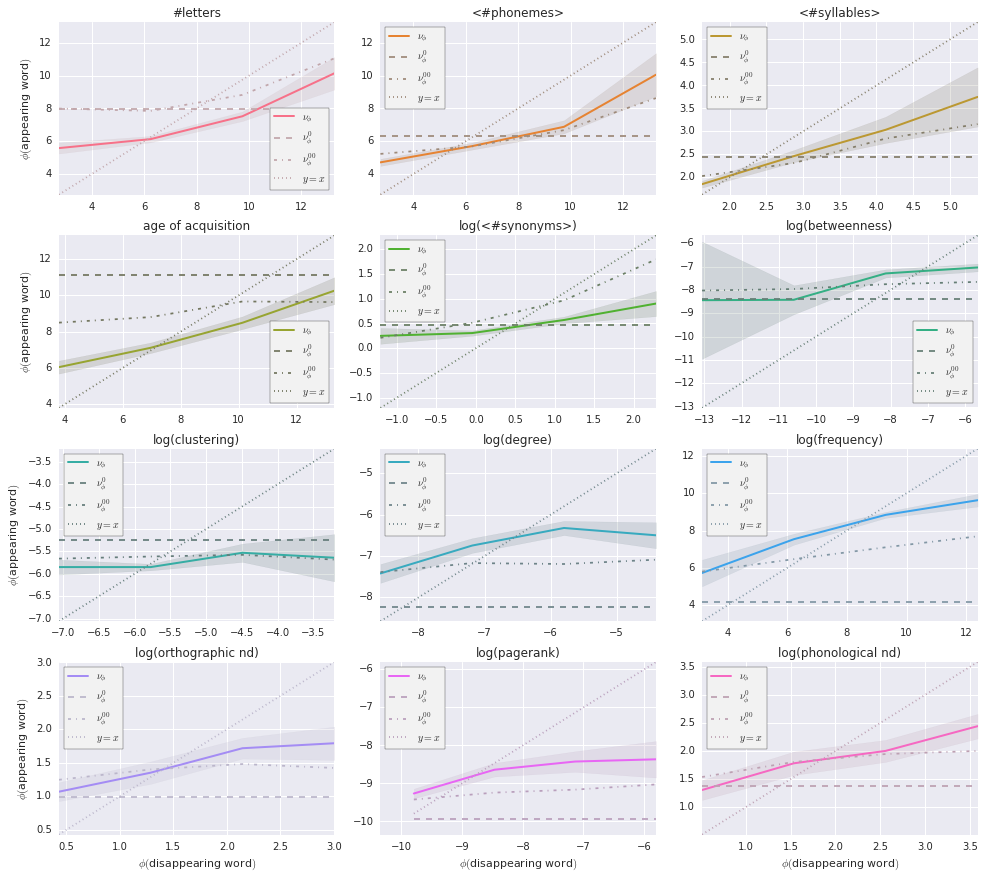

In [11]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

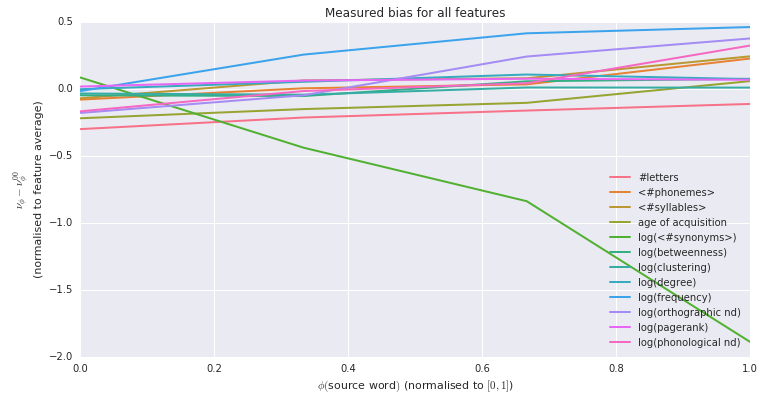

In [12]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | ns. |
H_00 | *   | *** | ns. | ns. |



-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | *** |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | **  | *** | **  | **  |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *   | ns. | **  | **  |


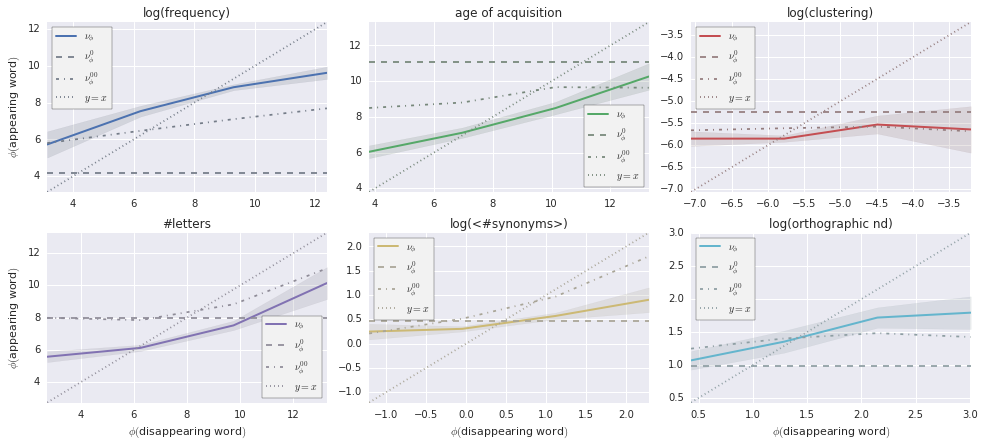

In [13]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

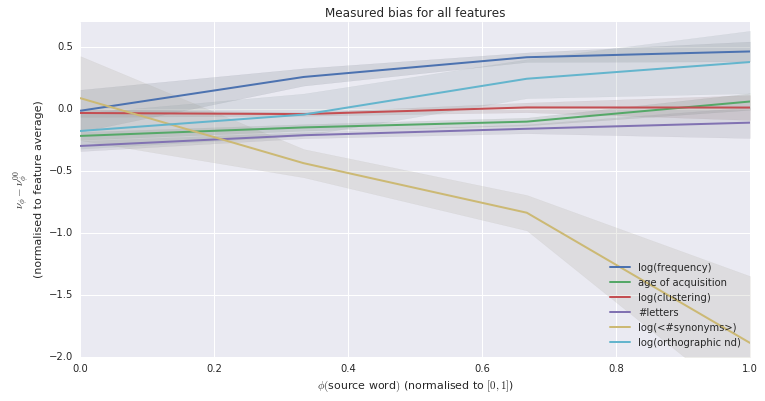

In [14]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)')\
    .set_ylim(-2, .7);

#### 2.1.2 Quantiles of distribution of appeared global feature values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *   | *** |
H_00 | *** | **  | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |
------------------
H_0  | *** | *** |
H_00 | *** | **  |



---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | ns. | *** |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |



----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | **  | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *   | ns. | ns. | *** |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | ns. | *   | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *   | ns. | ns. | *** |


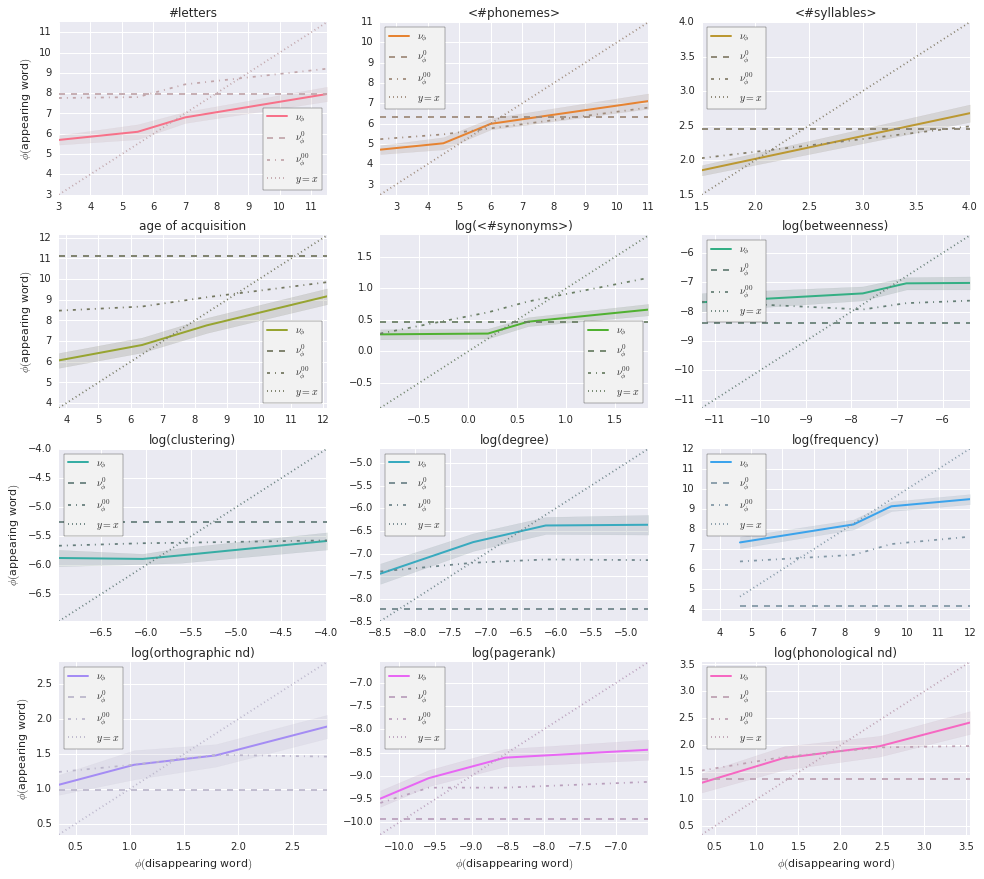

In [15]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

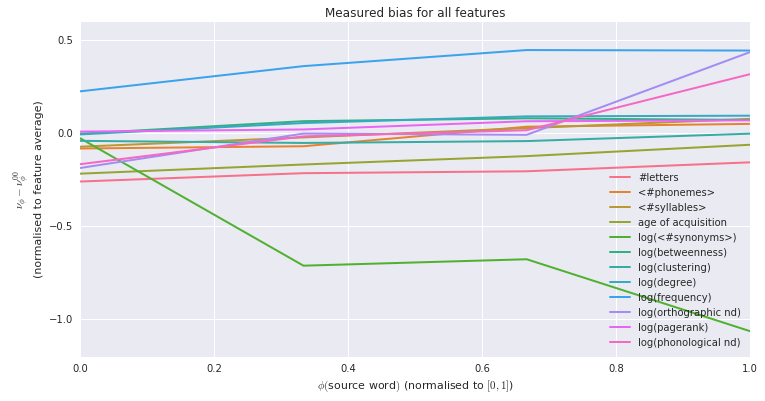

In [16]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | **  | ns. |



-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | ns. | *** |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *   | ns. | ns. | *** |


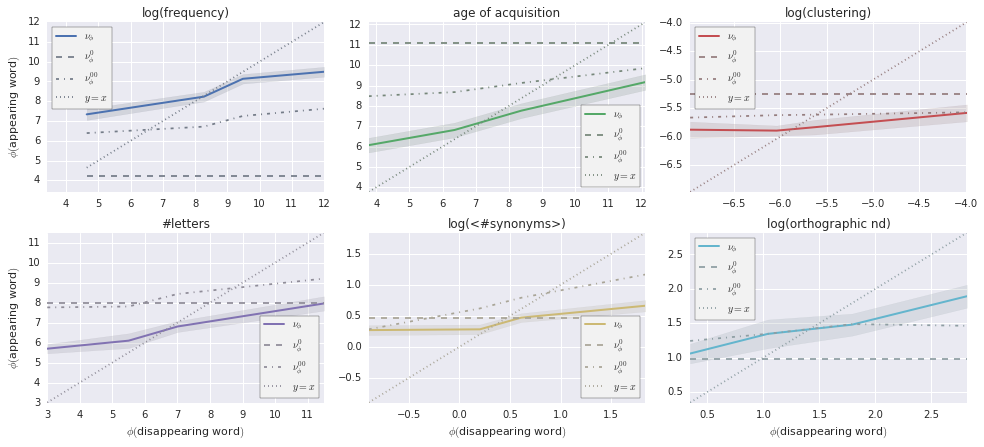

In [17]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

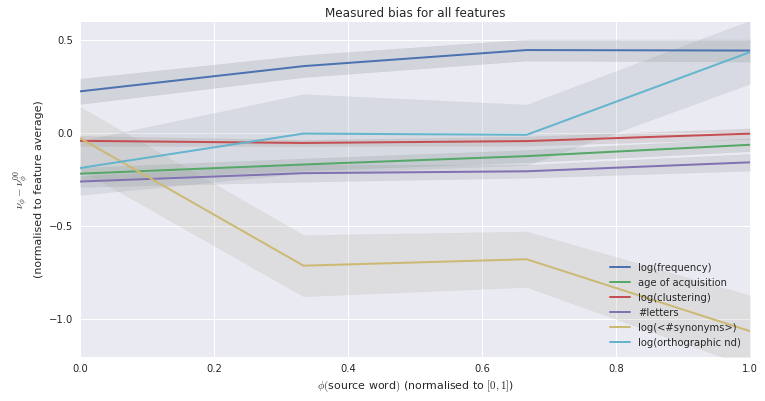

In [18]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'quantiles': True})\
    .set_ylim(-1.2, .6);

### 2.2 Sentence-relative feature values

#### 2.2.1 Bins of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *   | *** |
H_00 | **  | ns. | ns. | *   |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | **  | *** |


H_00 | ns. | *** | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | ns. |



--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | **  | ns. |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | ns. | ns. | *** | *** |
H_00 | ns. | ns. | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | ns. | *** | ns. | ns. |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | **  | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | ns. | *   | *   | ns. |



--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | *** | *** | **  |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |


H_00 | ns. | ns. | ns. | ns. |


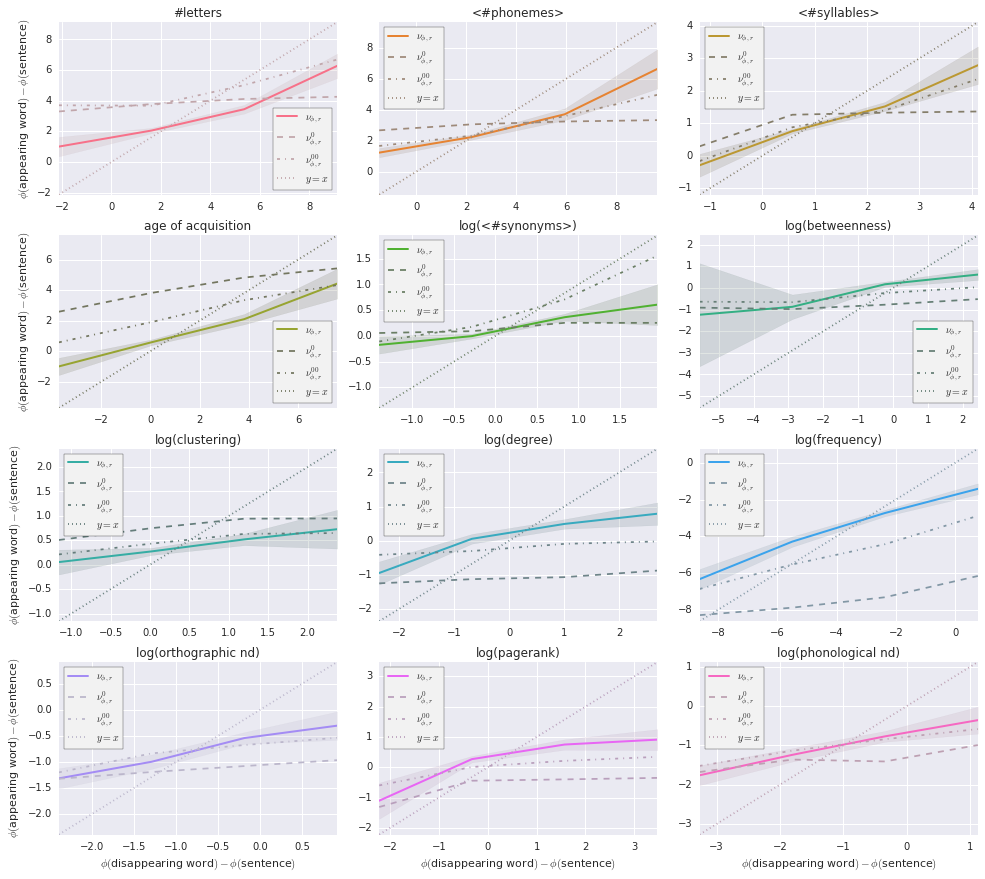

In [19]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

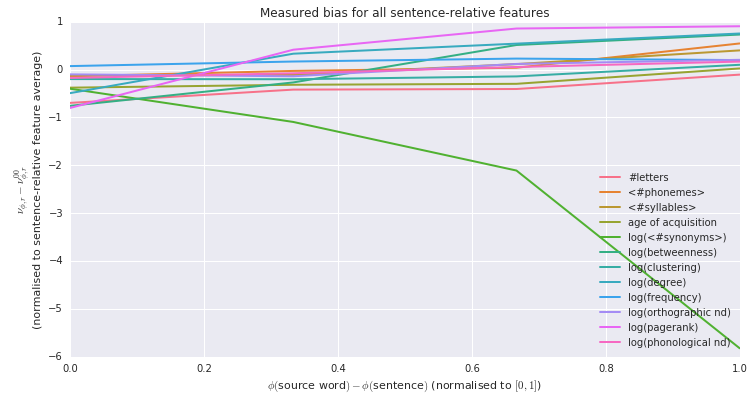

In [20]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |


H_00 | *** | *** | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | ns. | *** | ns. | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | **  | ns. |


H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | ns. | *   | *   | ns. |


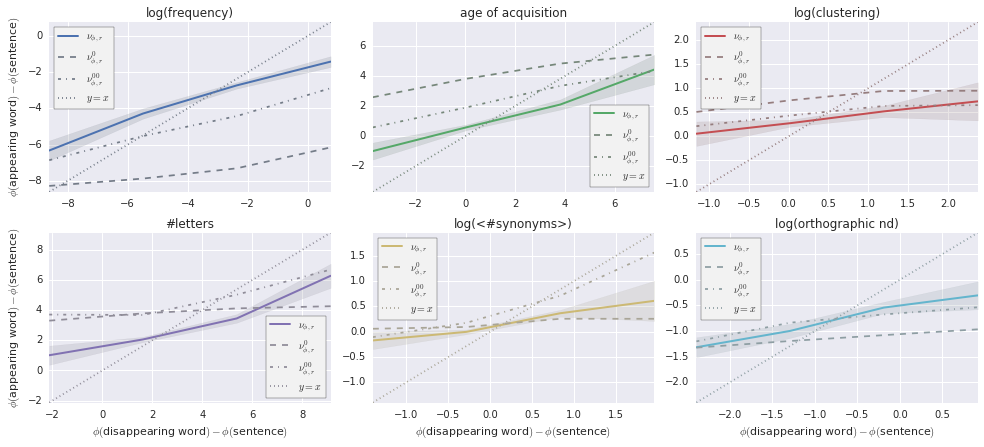

In [21]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

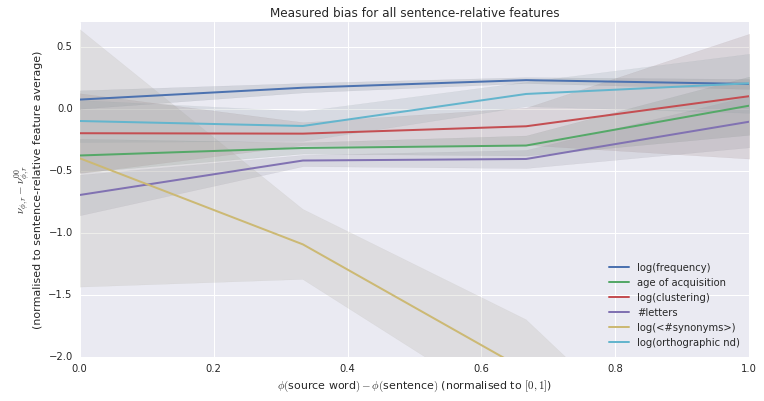

In [22]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_sentencerel',
             'deep', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True})\
    .set_ylim(-2, .7);

#### 2.2.2 Quantiles of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | **  | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |


H_00 | **  | *   | ns. | *   |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |



--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | ns. | *** |
H_00 | *   | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | ns. | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *   | *** | ns. | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | *   | ns. | ns. | *** |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | ns. | *   | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | *** |
H_00 | *   | ns. | ns. | ns. |


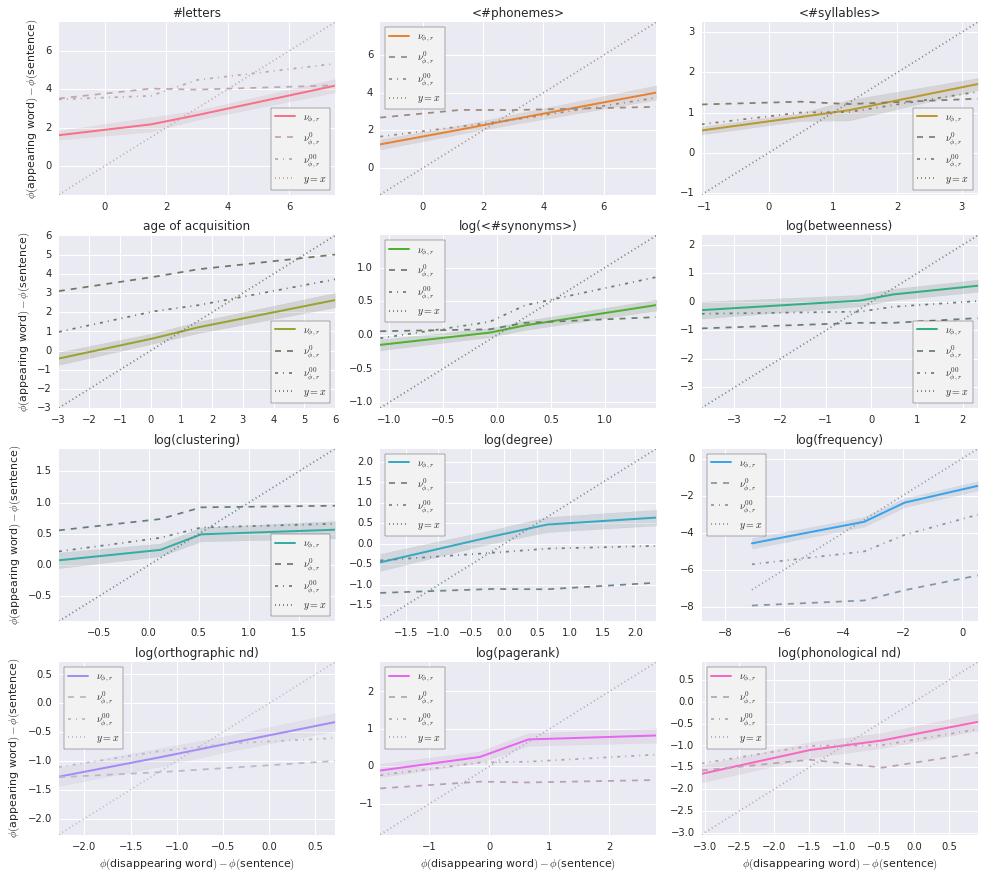

In [23]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

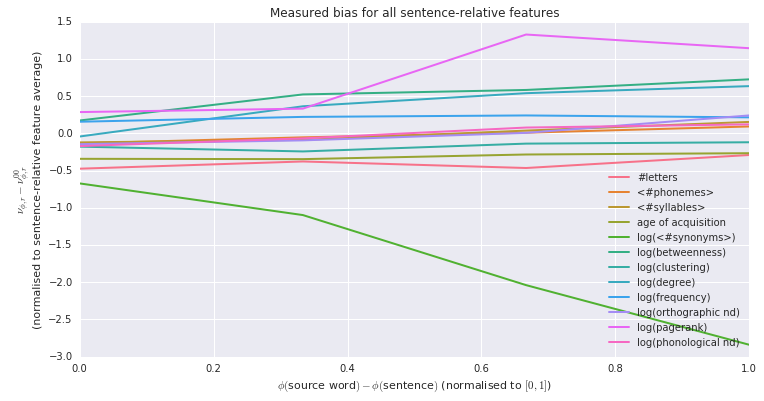

In [24]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *   | *** | ns. | ns. |



-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | ns. | ns. | *** |
H_00 | *   | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | *   | ns. | ns. | *** |


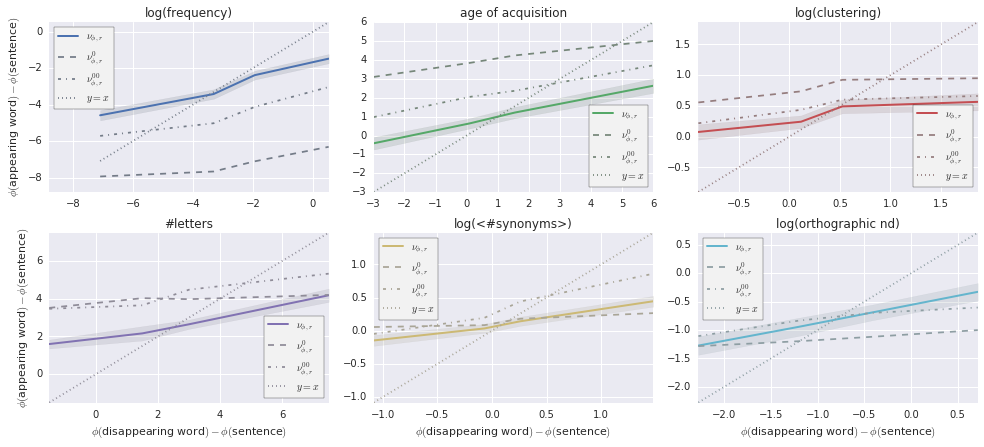

In [25]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

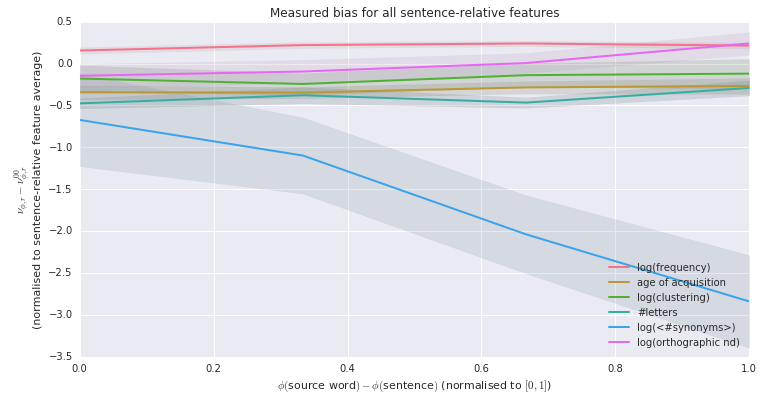

In [26]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True, 'quantiles': True});

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [27]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count,
                               right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count,
                               right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (
                dest[(x_bins == x) & (y_bins == y)] -
                source[(x_bins == x) & (y_bins == y)]
            ).mean()
            v_values[y, x] = (
                dest_rel[(x_bins == x) & (y_bins == y)] -
                source_rel[(x_bins == x) & (y_bins == y)]
            ).mean()
            strength[y, x] = np.sqrt(
                (dest[(x_bins == x) & (y_bins == y)] - 
                 source[(x_bins == x) & (y_bins == y)]) ** 2 +
                (dest_rel[(x_bins == x) & (y_bins == y)] - 
                 source_rel[(x_bins == x) & (y_bins == y)]) ** 2
            ).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), 
             label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


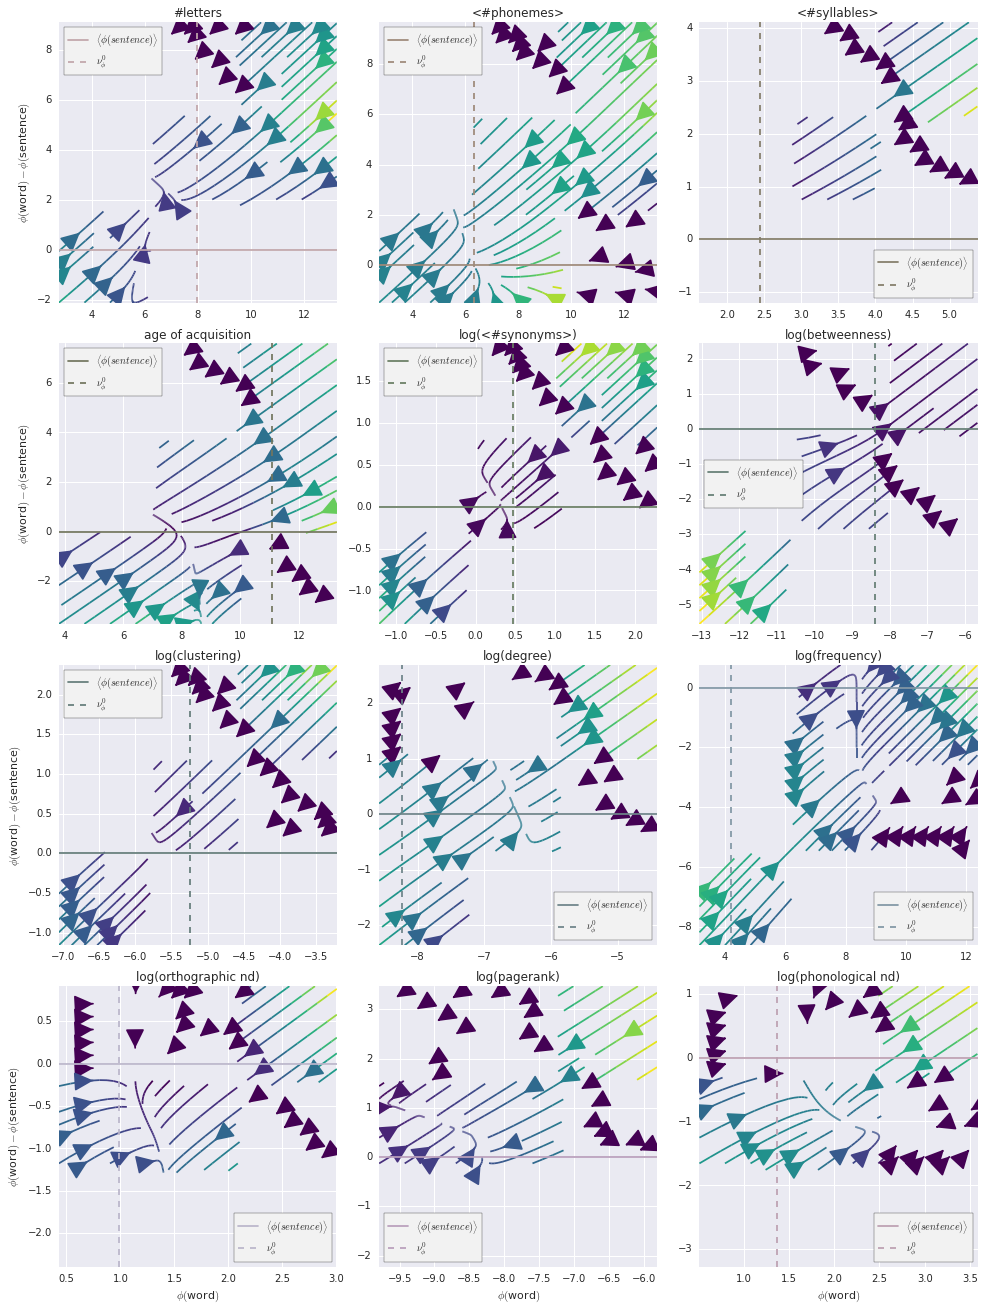

In [28]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


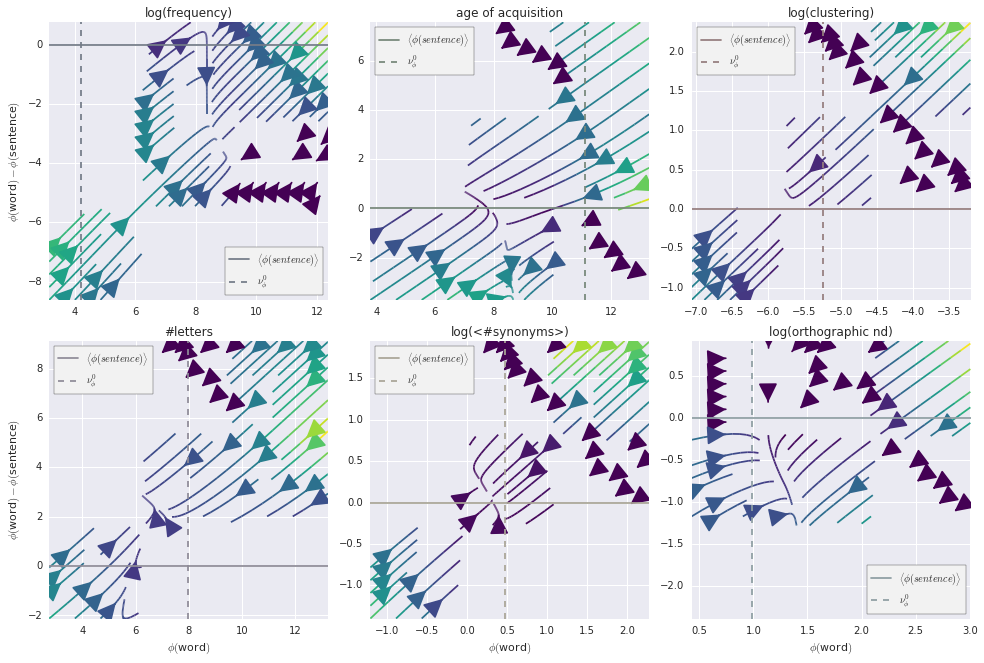

In [29]:
g = sb.FacetGrid(data=variations[variations['feature']
                                 .map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account, changing the values under the null hypotheses.

### 4.1 On all the features

Compute the actual PCA

In [30]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id',
                                 columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:"
      .format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.540878    0.18810011  0.06843222  0.06444056  0.03699766  0.02741058
  0.01949961  0.01779278  0.0161193   0.00948889]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,0.476135,-0.231608,0.080664,-0.212569,-0.195800,0.462955,-0.225974,-0.261994,0.429900,-0.289643,0.163943,0.002578
Component-1,-0.391168,0.379674,-0.175635,0.300296,0.262364,0.398662,-0.146972,0.302979,0.414143,-0.222074,0.139371,-0.019782
Component-2,0.223666,-0.232268,-0.066063,-0.047645,0.925944,-0.015178,-0.025363,-0.151063,-0.012605,0.064659,0.013629,-0.061633


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [31]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution\
                .components(component, pca, pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (   0 of 1731) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   9 of 1731) |                       | Elapsed Time: 0:00:43 ETA: 2:20:17

  1% (  34 of 1731) |                       | Elapsed Time: 0:00:44 ETA: 0:36:47

  3% (  65 of 1731) |                       | Elapsed Time: 0:00:44 ETA: 0:21:37

  5% ( 100 of 1731) |#                      | Elapsed Time: 0:00:44 ETA: 0:12:10

  7% ( 130 of 1731) |#                      | Elapsed Time: 0:00:45 ETA: 0:09:40

  8% ( 152 of 1731) |##                     | Elapsed Time: 0:00:45 ETA: 0:00:13

 10% ( 188 of 1731) |##                     | Elapsed Time: 0:00:45 ETA: 0:00:12

 12% ( 217 of 1731) |##                     | Elapsed Time: 0:00:45 ETA: 0:00:12

 13% ( 239 of 1731) |###                    | Elapsed Time: 0:00:45 ETA: 0:00:13

 15% ( 273 of 1731) |###                    | Elapsed Time: 0:00:46 ETA: 0:00:12

 17% ( 303 of 1731) |####                   | Elapsed Time: 0:00:46 ETA: 0:00:12

 19% ( 339 of 1731) |####                   | Elapsed Time: 0:00:46 ETA: 0:00:11

 20% ( 356 of 1731) |####                   | Elapsed Time: 0:00:46 ETA: 0:00:11

 22% ( 390 of 1731) |#####                  | Elapsed Time: 0:00:47 ETA: 0:00:11

 24% ( 425 of 1731) |#####                  | Elapsed Time: 0:00:47 ETA: 0:00:10

 25% ( 443 of 1731) |#####                  | Elapsed Time: 0:00:47 ETA: 0:00:10

 27% ( 477 of 1731) |######                 | Elapsed Time: 0:00:47 ETA: 0:00:10

 29% ( 510 of 1731) |######                 | Elapsed Time: 0:00:48 ETA: 0:00:10

 31% ( 541 of 1731) |#######                | Elapsed Time: 0:00:48 ETA: 0:00:09

 33% ( 574 of 1731) |#######                | Elapsed Time: 0:00:48 ETA: 0:00:09

 35% ( 606 of 1731) |########               | Elapsed Time: 0:00:49 ETA: 0:00:09

 36% ( 628 of 1731) |########               | Elapsed Time: 0:00:49 ETA: 0:00:09

 37% ( 650 of 1731) |########               | Elapsed Time: 0:00:49 ETA: 0:00:09

 39% ( 684 of 1731) |#########              | Elapsed Time: 0:00:49 ETA: 0:00:09

 41% ( 715 of 1731) |#########              | Elapsed Time: 0:00:50 ETA: 0:00:09

 43% ( 748 of 1731) |#########              | Elapsed Time: 0:00:50 ETA: 0:00:08

 45% ( 779 of 1731) |##########             | Elapsed Time: 0:00:50 ETA: 0:00:08

 46% ( 801 of 1731) |##########             | Elapsed Time: 0:00:50 ETA: 0:00:07

 48% ( 833 of 1731) |###########            | Elapsed Time: 0:00:51 ETA: 0:00:07

 50% ( 866 of 1731) |###########            | Elapsed Time: 0:00:51 ETA: 0:00:07

 51% ( 899 of 1731) |###########            | Elapsed Time: 0:00:51 ETA: 0:00:07

 53% ( 931 of 1731) |############           | Elapsed Time: 0:00:51 ETA: 0:00:06

 55% ( 963 of 1731) |############           | Elapsed Time: 0:00:52 ETA: 0:00:06

 57% ( 996 of 1731) |#############          | Elapsed Time: 0:00:52 ETA: 0:00:06

 59% (1028 of 1731) |#############          | Elapsed Time: 0:00:52 ETA: 0:00:05

 61% (1061 of 1731) |##############         | Elapsed Time: 0:00:52 ETA: 0:00:05

 63% (1094 of 1731) |##############         | Elapsed Time: 0:00:53 ETA: 0:00:05

 65% (1126 of 1731) |##############         | Elapsed Time: 0:00:53 ETA: 0:00:05

 67% (1162 of 1731) |###############        | Elapsed Time: 0:00:53 ETA: 0:00:04

 68% (1181 of 1731) |###############        | Elapsed Time: 0:00:53 ETA: 0:00:04

 70% (1212 of 1731) |################       | Elapsed Time: 0:00:54 ETA: 0:00:04

 72% (1248 of 1731) |################       | Elapsed Time: 0:00:54 ETA: 0:00:03

 73% (1277 of 1731) |################       | Elapsed Time: 0:00:54 ETA: 0:00:03

 75% (1314 of 1731) |#################      | Elapsed Time: 0:00:55 ETA: 0:00:03

 77% (1342 of 1731) |#################      | Elapsed Time: 0:00:55 ETA: 0:00:03

 79% (1377 of 1731) |##################     | Elapsed Time: 0:00:55 ETA: 0:00:02

 81% (1407 of 1731) |##################     | Elapsed Time: 0:00:55 ETA: 0:00:02

 83% (1441 of 1731) |###################    | Elapsed Time: 0:00:56 ETA: 0:00:02

 85% (1472 of 1731) |###################    | Elapsed Time: 0:00:56 ETA: 0:00:02

 87% (1506 of 1731) |####################   | Elapsed Time: 0:00:56 ETA: 0:00:01

 88% (1537 of 1731) |####################   | Elapsed Time: 0:00:56 ETA: 0:00:01

 90% (1568 of 1731) |####################   | Elapsed Time: 0:00:57 ETA: 0:00:01

 92% (1602 of 1731) |#####################  | Elapsed Time: 0:00:57 ETA: 0:00:01

 94% (1636 of 1731) |#####################  | Elapsed Time: 0:00:57 ETA: 0:00:00

 96% (1667 of 1731) |###################### | Elapsed Time: 0:00:57 ETA: 0:00:00

 98% (1701 of 1731) |###################### | Elapsed Time: 0:00:58 ETA: 0:00:00

100% (1731 of 1731) |######################| Elapsed Time: 0:00:58 Time: 0:00:58


Compute cluster averages (so as not to overestimate confidence intervals).

In [32]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |
H_00 | *** | *** | ns. | **  |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | *** |
H_00 | ns. | *** | *** | **  |

---
2.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | ns. | *** | *** | *** |
H_00 | ns. | *   | *** | *** |


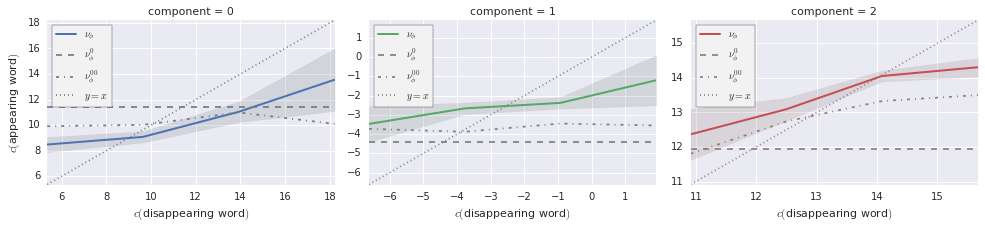

In [33]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On a subset of relevant features

In [34]:
relevant_features = ['frequency', 'aoa', 'letters_count']

Compute the actual PCA

In [35]:
# Compute the PCA.
pcafeatures = tuple(sorted(relevant_features))
pcavariations = variations[variations['feature']
                           .map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

pd.DataFrame(pca.components_,
             columns=pcafeatures,
             index=['Component-{}'.format(i)
                    for i in range(pca.n_components_)])

MLE estimates there are 2 components.

Those explain the following variance:
[ 0.65754448  0.21201271]



,aoa,frequency,letters_count
Component-0,0.759097,-0.394938,0.517490
Component-1,-0.388738,0.362630,0.846984


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [36]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(pca.n_components_):
            source, destination = substitution.components(component, pca,
                                                          pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (   0 of 1731) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  1% (  22 of 1731) |                       | Elapsed Time: 0:00:03 ETA: 0:05:29

  3% (  65 of 1731) |                       | Elapsed Time: 0:00:03 ETA: 0:01:33

  6% ( 109 of 1731) |#                      | Elapsed Time: 0:00:03 ETA: 0:00:57

  8% ( 152 of 1731) |##                     | Elapsed Time: 0:00:03 ETA: 0:00:42

 11% ( 195 of 1731) |##                     | Elapsed Time: 0:00:04 ETA: 0:00:09

 13% ( 239 of 1731) |###                    | Elapsed Time: 0:00:04 ETA: 0:00:09

 16% ( 282 of 1731) |###                    | Elapsed Time: 0:00:04 ETA: 0:00:09

 18% ( 325 of 1731) |####                   | Elapsed Time: 0:00:05 ETA: 0:00:09

 21% ( 368 of 1731) |####                   | Elapsed Time: 0:00:05 ETA: 0:00:08

 23% ( 412 of 1731) |#####                  | Elapsed Time: 0:00:05 ETA: 0:00:08

 26% ( 455 of 1731) |######                 | Elapsed Time: 0:00:05 ETA: 0:00:08

 28% ( 498 of 1731) |######                 | Elapsed Time: 0:00:06 ETA: 0:00:07

 31% ( 541 of 1731) |#######                | Elapsed Time: 0:00:06 ETA: 0:00:07

 33% ( 585 of 1731) |#######                | Elapsed Time: 0:00:06 ETA: 0:00:07

 36% ( 628 of 1731) |########               | Elapsed Time: 0:00:06 ETA: 0:00:06

 38% ( 671 of 1731) |########               | Elapsed Time: 0:00:07 ETA: 0:00:06

 41% ( 715 of 1731) |#########              | Elapsed Time: 0:00:07 ETA: 0:00:06

 43% ( 758 of 1731) |##########             | Elapsed Time: 0:00:07 ETA: 0:00:06

 46% ( 801 of 1731) |##########             | Elapsed Time: 0:00:08 ETA: 0:00:05

 48% ( 844 of 1731) |###########            | Elapsed Time: 0:00:08 ETA: 0:00:05

 51% ( 888 of 1731) |###########            | Elapsed Time: 0:00:08 ETA: 0:00:05

 53% ( 931 of 1731) |############           | Elapsed Time: 0:00:08 ETA: 0:00:04

 56% ( 974 of 1731) |############           | Elapsed Time: 0:00:09 ETA: 0:00:04

 58% (1017 of 1731) |#############          | Elapsed Time: 0:00:09 ETA: 0:00:04

 61% (1061 of 1731) |##############         | Elapsed Time: 0:00:09 ETA: 0:00:04

 63% (1104 of 1731) |##############         | Elapsed Time: 0:00:09 ETA: 0:00:03

 66% (1147 of 1731) |###############        | Elapsed Time: 0:00:10 ETA: 0:00:03

 68% (1191 of 1731) |###############        | Elapsed Time: 0:00:10 ETA: 0:00:03

 71% (1234 of 1731) |################       | Elapsed Time: 0:00:10 ETA: 0:00:02

 73% (1277 of 1731) |################       | Elapsed Time: 0:00:10 ETA: 0:00:02

 76% (1320 of 1731) |#################      | Elapsed Time: 0:00:11 ETA: 0:00:02

 78% (1364 of 1731) |##################     | Elapsed Time: 0:00:11 ETA: 0:00:02

 81% (1407 of 1731) |##################     | Elapsed Time: 0:00:11 ETA: 0:00:01

 83% (1450 of 1731) |###################    | Elapsed Time: 0:00:11 ETA: 0:00:01

 86% (1493 of 1731) |###################    | Elapsed Time: 0:00:12 ETA: 0:00:01

 88% (1537 of 1731) |####################   | Elapsed Time: 0:00:12 ETA: 0:00:01

 91% (1580 of 1731) |####################   | Elapsed Time: 0:00:12 ETA: 0:00:00

 93% (1623 of 1731) |#####################  | Elapsed Time: 0:00:12 ETA: 0:00:00

 96% (1667 of 1731) |###################### | Elapsed Time: 0:00:13 ETA: 0:00:00

 98% (1710 of 1731) |###################### | Elapsed Time: 0:00:13 ETA: 0:00:00

100% (1731 of 1731) |######################| Elapsed Time: 0:00:13 Time: 0:00:13


Compute cluster averages (so as not to overestimate confidence intervals).

In [37]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *   | ns. |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |


H_00 | ns. | *** | *** | **  |


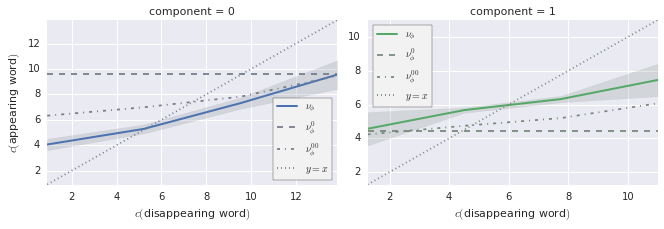

In [38]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `relevant_features`). So note the following:

In [39]:
for feature in relevant_features:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution
                               ._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature)
                 for feature in relevant_features]:
    words.update(tfeature())

data = dict((feature, []) for feature in relevant_features)
words_list = []
for word in words:
    words_list.append(word)
    for feature in relevant_features:
        data[feature].append(Substitution
                             ._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, "
      "only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, "
      "but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'letters_count' is based on 42786 words.



Among all the set of words used by these features, only 14450 are used.

Similarly, we mined 1044 (cluster-unique) substitutions, but the PCA is in fact computed on 793 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.

## 5 Interactions between features (by Anova)

Some useful variables first.

In [40]:
cuts = [('fixed bins', pd.cut)]#, ('quantiles', pd.qcut)]
rels = [('global', ''), ('sentence-relative', '_rel')]

def star_level(p):
    if p < .001:
        return '***'
    elif p < .01:
        return ' **'
    elif p < .05:
        return '  *'
    else:
        return 'ns.'

Now for each feature, assess if it has an interaction with the other features' **destination value**. We look at this for all pairs of features, with all pairs of global/sentence-relative value and types of binning (fixed width/quantiles). So it's a lot of answers.

Three stars means $p < .001$, two $p < .01$, one $p < .05$, and `ns.` means non-significative.

In [41]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
   ** global -> global
    * global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
    * global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative


   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
    * sentence-relative -> global
   ** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
    * global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> aoa


   ** global -> global
    * global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  *** global -> global
    * global -> sentence-relative
   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> synonyms_count
    * global -> global
  ns. global -> sentence-relative
   ** sentence-relative -> global


   ** sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
    * sentence-relative -> global
   ** sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
  *** global -> global
   ** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
   ** global -> global


  ns. global -> sentence-relative


  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
   ** global -> global
    * global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
    * global -> global
    * global -> sentence-relative
    * sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count


   ** global -> global
    * global -> sentence-relative
   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


    * sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
   ** global -> global


  ns. global -> sentence-relative
   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  ns. global -> sentence-relative
  *** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> clustering
   ** global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Now for each feature, look at its interaction with the other features' **variation (i.e. destination - source)**. Same drill, same combinations.

In [42]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]\
                    - variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global


  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
   ** global -> global


   ** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global


  *** global -> sentence-relative


   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
    * global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
  *** global -> global
   ** global -> sentence-relative
    * sentence-relative -> global


    * sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> aoa


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count


  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
  *** global -> global


  *** global -> sentence-relative


   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count


  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative



Ok, so this can go on for a long time, and I'm not going to look at interactions with this lens (meaning at interaction of couples of features with another feature's destination values).

## 6 Regression

In [43]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [44]:
rels = {False: ('global', ''),
        True: ('rel', '_rel')}

def regress(data, features, target,
            source_rel=False, dest_rel=False, interactions=False):
    if source_rel not in [True, False, 'both']:
        raise ValueError
    if not isinstance(dest_rel, bool):
        raise ValueError
    # Process source/destination relativeness arguments.
    if isinstance(source_rel, bool):
        source_rel = [source_rel]
    else:
        source_rel = [False, True]
    dest_rel_name, dest_rel = rels[dest_rel]
    
    features = tuple(sorted(features))
    feature_tuples = [('source' + rels[rel][1], feature)
                      for rel in source_rel
                      for feature in features]
    feature_names = [rels[rel][0] + '_' + feature
                     for rel in source_rel
                     for feature in features]
    
    # Get source and destination values.
    source = pd.pivot_table(
        data,
        values=['source' + rels[rel][1] for rel in source_rel],
        index=['cluster_id'],
        columns=['feature']
    )[feature_tuples].dropna()
    destination = variations[variations.feature == target]\
        .pivot(index='cluster_id', columns='feature',
               values='destination' + dest_rel)\
        .loc[source.index][target].dropna()
    source = source.loc[destination.index].values
    destination = destination.values

    # If asked to, get polynomial features.
    if interactions:
        poly = PolynomialFeatures(degree=2, interaction_only=True)
        source = poly.fit_transform(source)
        regress_features = [' * '.join([feature_names[j]
                                        for j, p in enumerate(powers)
                                        if p > 0]) or 'intercept'
                            for powers in poly.powers_]
    else:
        regress_features = feature_names

    # Regress.
    linreg = linear_model.LinearRegression(fit_intercept=not interactions)
    linreg.fit(source, destination)

    # And print the score and coefficients.
    print('Regressing {} with {} measures, {} interactions'
          .format(dest_rel_name + ' ' + target, len(source),
                  'with' if interactions else 'no'))
    print('           ' + '^' * len(dest_rel_name + ' ' + target))
    print('R^2 = {}'
          .format(linreg.score(source, destination)))
    print()
    coeffs = pd.Series(index=regress_features, data=linreg.coef_)
    if not interactions:
        coeffs = pd.Series(index=['intercept'], data=[linreg.intercept_])\
            .append(coeffs)
    with pd.option_context('display.max_rows', 999):
        print(coeffs)

In [45]:
for target in PAPER_FEATURES:
    print('-' * 70)
    for source_rel, dest_rel in product([False, True, 'both'],
                                        [False, True]):
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel)
        print()
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel, interactions=True)
        print()

----------------------------------------------------------------------
Regressing global frequency with 599 measures, no interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.11946026522497301

intercept                      4.244737
global_aoa                     0.089478
global_clustering              0.032972
global_frequency               0.472450
global_letters_count          -0.021912
global_orthographic_density    0.007935
global_synonyms_count         -0.011685
dtype: float64

Regressing global frequency with 599 measures, with interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.15294793701154907

intercept                                             -14.674892
global_aoa                                              0.816777
global_clustering                                      -1.554803
global_frequency                                        2.684220
global_letters_count                                    0.336310
global_orthographic_density                             1.515451
globa

Regressing rel frequency with 599 measures, with interactions
           ^^^^^^^^^^^^^
R^2 = 0.2787382515387319

intercept                                       -1.594596
rel_aoa                                          0.009612
rel_clustering                                   0.124246
rel_frequency                                    0.563577
rel_letters_count                                0.063035
rel_orthographic_density                        -0.480848
rel_synonyms_count                               0.059842
rel_aoa * rel_clustering                        -0.029095
rel_aoa * rel_frequency                         -0.066400
rel_aoa * rel_letters_count                     -0.004742
rel_aoa * rel_orthographic_density               0.117403
rel_aoa * rel_synonyms_count                     0.009969
rel_clustering * rel_frequency                  -0.007408
rel_clustering * rel_letters_count               0.003979
rel_clustering * rel_orthographic_density       -0.011453
rel_clustering * 

Regressing global aoa with 535 measures, with interactions
           ^^^^^^^^^^
R^2 = 0.18963080534002152

intercept                                             -0.404739
global_aoa                                             0.680419
global_clustering                                     -1.526945
global_frequency                                      -0.723803
global_letters_count                                   1.160922
global_orthographic_density                           -1.559556
global_synonyms_count                                 -1.617177
global_aoa * global_clustering                         0.103384
global_aoa * global_frequency                          0.035339
global_aoa * global_letters_count                     -0.006555
global_aoa * global_orthographic_density              -0.044104
global_aoa * global_synonyms_count                     0.079924
global_clustering * global_frequency                  -0.035211
global_clustering * global_letters_count               0.154

Regressing global aoa with 535 measures, no interactions
           ^^^^^^^^^^
R^2 = 0.19685881814156422

intercept                      0.845746
global_aoa                     0.463783
global_clustering             -0.688148
global_frequency              -0.274694
global_letters_count           0.363817
global_orthographic_density    0.055615
global_synonyms_count          0.413354
rel_aoa                       -0.206087
rel_clustering                 0.471269
rel_frequency                  0.132486
rel_letters_count             -0.276951
rel_orthographic_density      -0.049432
rel_synonyms_count            -0.547346
dtype: float64

Regressing global aoa with 535 measures, with interactions
           ^^^^^^^^^^
R^2 = 0.35035190236736447

intercept                                                 50.339558
global_aoa                                                -0.320085
global_clustering                                          5.190957
global_frequency                              

Regressing rel clustering with 480 measures, no interactions
           ^^^^^^^^^^^^^^
R^2 = 0.03587002880767953

intercept                      1.676049
global_aoa                    -0.028683
global_clustering              0.099134
global_frequency              -0.060134
global_letters_count           0.010488
global_orthographic_density   -0.029238
global_synonyms_count         -0.032809
dtype: float64

Regressing rel clustering with 480 measures, with interactions
           ^^^^^^^^^^^^^^
R^2 = 0.08754885037413396

intercept                                              5.973297
global_aoa                                             0.254595
global_clustering                                      0.655701
global_frequency                                      -0.772404
global_letters_count                                  -0.200488
global_orthographic_density                            0.034074
global_synonyms_count                                 -0.212899
global_aoa * global_cluste

Regressing global clustering with 480 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.2697042755363883

intercept                                                 13.139926
global_aoa                                                 0.705654
global_clustering                                          2.260347
global_frequency                                          -1.778163
global_letters_count                                      -0.500973
global_orthographic_density                               -1.884769
global_synonyms_count                                     -3.264594
rel_aoa                                                   -0.382447
rel_clustering                                            -2.846404
rel_frequency                                              0.791035
rel_letters_count                                          0.059207
rel_orthographic_density                                   1.348443
rel_synonyms_count                                         2.20

intercept                                             -3.551554
global_aoa                                             0.129032
global_clustering                                     -2.621013
global_frequency                                      -0.698982
global_letters_count                                   0.416312
global_orthographic_density                           -1.177127
global_synonyms_count                                  2.391792
global_aoa * global_clustering                         0.105207
global_aoa * global_frequency                          0.078317
global_aoa * global_letters_count                     -0.033039
global_aoa * global_orthographic_density              -0.080827
global_aoa * global_synonyms_count                     0.015528
global_clustering * global_frequency                   0.119500
global_clustering * global_letters_count               0.087493
global_clustering * global_orthographic_density        0.117175
global_clustering * global_synonyms_coun

Regressing rel letters_count with 599 measures, no interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.18308957944864943

intercept                      1.064841
global_aoa                    -0.003168
global_clustering             -0.353389
global_frequency              -0.005660
global_letters_count          -0.465103
global_orthographic_density    0.018866
global_synonyms_count          0.287001
rel_aoa                       -0.067868
rel_clustering                 0.428417
rel_frequency                 -0.021287
rel_letters_count              0.755463
rel_orthographic_density      -0.187386
rel_synonyms_count            -0.627265
dtype: float64

Regressing rel letters_count with 599 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.28551916782407993

intercept                                                -6.275177
global_aoa                                                0.028154
global_clustering                                        -2.955296
global_frequency     

Regressing global synonyms_count with 581 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.11104745362682

intercept                                        0.515761
rel_aoa                                          0.037071
rel_clustering                                  -0.203450
rel_frequency                                    0.022477
rel_letters_count                               -0.085012
rel_orthographic_density                         0.053456
rel_synonyms_count                               0.222772
rel_aoa * rel_clustering                        -0.034539
rel_aoa * rel_frequency                         -0.003263
rel_aoa * rel_letters_count                      0.014058
rel_aoa * rel_orthographic_density               0.027599
rel_aoa * rel_synonyms_count                     0.036819
rel_clustering * rel_frequency                  -0.036598
rel_clustering * rel_letters_count              -0.012946
rel_clustering * rel_orthographic_density       -0.106112
rel

Regressing rel synonyms_count with 581 measures, with interactions
           ^^^^^^^^^^^^^^^^^^
R^2 = 0.35388558278644666

intercept                                                -6.979520
global_aoa                                                0.887398
global_clustering                                         0.272307
global_frequency                                          0.113327
global_letters_count                                      0.721167
global_orthographic_density                               3.629692
global_synonyms_count                                     2.074374
rel_aoa                                                   0.074200
rel_clustering                                           -1.544355
rel_frequency                                            -0.536798
rel_letters_count                                        -0.964941
rel_orthographic_density                                 -1.541725
rel_synonyms_count                                       -3.625074
globa

Regressing rel orthographic_density with 489 measures, no interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.15002197023988628

intercept                  -0.450579
rel_aoa                     0.018079
rel_clustering             -0.067683
rel_frequency               0.040373
rel_letters_count           0.010039
rel_orthographic_density    0.374944
rel_synonyms_count          0.119695
dtype: float64

Regressing rel orthographic_density with 489 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.1675317028938912

intercept                                       -0.397584
rel_aoa                                          0.082486
rel_clustering                                  -0.003808
rel_frequency                                    0.057852
rel_letters_count                               -0.021183
rel_orthographic_density                         0.381010
rel_synonyms_count                               0.127523
rel_aoa * rel_clustering                         0